# Group 4- Group Project

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Chantelle's Drive
file_path = '/content/drive/MyDrive/HAD7001/Group Project/Updated Files - Jan 2025/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv'
df = pd.read_csv(file_path)

#print(df)

<ipython-input-3-5f64298cf599>:3: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#Saeedeh's Drive
file_path = '/content/drive/MyDrive/HAD7001/Updated Files - Jan 2025/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv'
df = pd.read_csv(file_path)

print(df)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) #This allows us to view all columns to reset use: pd.reset_option('display.max_columns')
# Inspect the first few rows of the data
df.head()

,Age_at_Exam,Sex,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Patient_ID,DM_OnsetDate,DM_Onset_Revised_1YrPrior,[Amputation),[Amputation_Date],[Anxiety),[Anxiety_Date],[Arrhythmia),[Arrhythmia_Date],[AtrialFibrillation),[AtrialFibrillation_Date],[Blindness),[Blindness_Date],[CABG),[CABG_Date],[CAD),[CAD_Date],[Cancer),[Cancer_Date],[Cardiomyopathy),[Cardiomyopathy_Date],[Cataract),[Cataract_Date],[CKD),[CKD_Date],[Deceased),[Deceased_Date],[Depression),[Depression_Date],[DiabeticFootUlcer),[DiabeticFootUlcer_Date],[Dialysis),[Dialysis_Date],[Enteropathy),[Enteropathy_Date],[ESRD),[ESRD_Date],[Gangrene),[Gangrene_Date],[Gastroparesis),[Gastroparesis_Date],[GERD),[GERD_Date],[Glaucoma),[Glaucoma_Date],[HeartTransplant),[HeartTransplant_Date],[IntermittentClaudication),[IntermittentClaudication_Date],[KidneyTransplant),[KidneyTransplant_Date],[Microalbuminuria),[Microalbuminuria_Date],[MyocardialInfarct),[MyocardialInfarct_Date],[NAFLD),[NAFLD_Date],[Nephropathy),[Nephropathy_Date],[Neuropathy),[Neuropathy_Date],[PeritonealDialysis),[PeritonealDialysis_Date],[Proteinuria),[Proteinuria_Date],[PVD),[PVD_Date],[RetinalTear),[RetinalTear_Date],[Retinopathy),[Retinopathy_Date],[RIND),[RIND_Date],[Sarcoma),[Sarcoma_Date],[Stent),[Stent_Date],[Stroke),[Stroke_Date],[TIA),[TIA_Date],[UTI),[UTI_Date],concat(DiagnosisText_Orig),Year,C_R1_MatchRule,C_R1_FoundWords,C_R1_FoundMoreThanOnceBinary,C_R1_FoundMoreThanOnceWords,C_R1_FoundNum_RepeatNo,C_R1_FoundNum_RepeatYes,C_R1_ReplacedWords,C_R1_ReplacedOrNotBinary,C_R1_ReplacedMoreThanOnceBinary,C_R1_ReplacedMoreThanOnceWords,C_R1_ReplacedNum_RepeatNo,b_R1_skin,b_R1_foot,b_R1_psych,b_R1_heart,b_R1_eye,b_R1_cancer,b_R1_kidney,b_R1_brain,b_R1_death,b_R1_gastric,b_R1_pancreas,b_R1_sleep,first_b_R1_[2ndline-antidiabetic],first_StartDate_b_R1_[2ndline-antidiabetic],first_StopDate_b_R1_[2ndline-antidiabetic],last_b_R1_[2ndline-antidiabetic],last_StartDate_b_R1_[2ndline-antidiabetic],last_StopDate_b_R1_[2ndline-antidiabetic],duration_b_R1_[2ndline-antidiabetic]_Days,total_b_R1_[2ndline-antidiabetic]_Records,first_b_R1_[anticholesterol],first_StartDate_b_R1_[anticholesterol],first_StopDate_b_R1_[anticholesterol],last_b_R1_[anticholesterol],last_StartDate_b_R1_[anticholesterol],last_StopDate_b_R1_[anticholesterol],duration_b_R1_[anticholesterol]_Days,total_b_R1_[anticholesterol]_Records,first_b_R1_[antihtn],first_StartDate_b_R1_[antihtn],first_StopDate_b_R1_[antihtn],last_b_R1_[antihtn],last_StartDate_b_R1_[antihtn],last_StopDate_b_R1_[antihtn],duration_b_R1_[antihtn]_Days,total_b_R1_[antihtn]_Records,first_b_R1_[corticosteroid],first_StartDate_b_R1_[corticosteroid],first_StopDate_b_R1_[corticosteroid],last_b_R1_[corticosteroid],last_StartDate_b_R1_[corticosteroid],last_StopDate_b_R1_[corticosteroid],duration_b_R1_[corticosteroid]_Days,total_b_R1_[corticosteroid]_Records,first_b_R1_[1stlineantidiabetic],first_StartDate_b_R1_[1stlineantidiabetic],first_StopDate_b_R1_[1stlineantidiabetic],last_b_R1_[1stlineantidiabetic],last_StartDate_b_R1_[1stlineantidiabetic],last_StopDate_b_R1_[1stlineantidiabetic],duration_b_R1_[1stlineantidiabetic]_Days,total_b_R1_[1stlineantidiabetic]_Records
0,69,Male,140.0,2010-03-18,26.000000,2010-12-17,3.35,2010-03-06,1.03,2010-03-06,5.9,2010-03-06,1.74,2010-03-06,6.2,2010-03-06,5.17,2010-03-06,0,0,NaN,1,2009-11-13,0,NaN,0,NaN,4001000000255938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,NaN,NaN,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2010-03-18,NaN,1.0,2015-02-06,NaN,NaN,8.

###Data Cleaning

In [ ]:
#Remove multiple instances of the patient
#if there are multiple instances of the same Patient_ID, only keep the first instance based on SBP_Date(Date of the systolic blood pressure measurement)
#sBP_Date was chosen as it was collected at each visit, thus only the first instance should be kept.
df["sBP_Date"] = pd.to_datetime(df["sBP_Date"], errors='coerce')
print(df["sBP_Date"].dtype)

df = df.loc[df.groupby("Patient_ID")["sBP_Date"].idxmin()]
df = df.dropna(subset=["sBP_Date"])
print(df)

datetime64[ns]
        Age_at_Exam     Sex    sBP   sBP_Date   BMI    BMI_Date   LDL  \
758              60    Male  132.0 2009-09-30  28.3  2010-03-09  1.93   
852              49    Male  127.0 2015-03-17  24.8  2015-03-17  3.14   
1396             53  Female  140.0 2007-12-12  31.6  2007-12-12  2.86   
345              49  Female  130.0 2008-06-10  22.5  2008-06-10  3.78   
809              52    Male  120.0 2007-06-25  30.8  2007-06-25  4.52   
...             ...     ...    ...        ...   ...         ...   ...   
655900           56  Female  110.0 2005-11-14  48.4  2005-05-30  1.69   
174294           64  Female  110.0 2010-01-06  23.4  2009-06-23  2.62   
160132           60  Female  100.0 2008-09-08  22.5  2008-10-20  4.36   
167286           49  Female  134.0 2014-01-08  26.1  2014-02-26  2.05   
160215           69    Male  150.0 2008-09-16  29.3  2008-09-16  3.59   

          LDL_Date   HDL    HDL_Date  A1c    A1c_Date    TG     TG_Date  FBS  \
758     2009-10-21  0.76  20

In [ ]:
# double check if there are repeating Patient_ID left
duplicate_counts = df["Patient_ID"].value_counts()
repeated_ids = duplicate_counts[duplicate_counts > 1]

if not repeated_ids.empty:
    print("There are repeating Patient_IDs:")
    print(repeated_ids)
else:
    print("No repeating Patient_IDs found.")

No repeating Patient_IDs found.


In [ ]:
#Only keep patients that have diabetes
df = df[df['Diabetes'] == 1]
print(df)

        Age_at_Exam     Sex    sBP   sBP_Date        BMI    BMI_Date   LDL  \
712900           57    Male  114.0 2007-07-24  30.000000  2007-07-31  3.75   
711733           65  Female  120.0 2005-12-20  39.300000  2006-09-05  1.75   
713436           70  Female  140.0 2007-04-27  33.800000  2008-03-20  2.05   
713447           56  Female  124.0 2005-08-09  46.100000  2005-10-14  3.26   
712785           49    Male  136.0 2008-11-03  37.400000  2009-05-01  1.69   
...             ...     ...    ...        ...        ...         ...   ...   
652667           75    Male  150.0 2005-09-01  30.000000  2005-09-01  1.30   
652556           50  Female  122.0 2006-10-13  63.764128  2007-01-08  1.75   
652227           82  Female  145.0 2005-03-31  37.000000  2005-10-05  1.64   
652150           62    Male  174.0 2010-02-27  44.100000  2010-02-27  2.14   
655900           56  Female  110.0 2005-11-14  48.400000  2005-05-30  1.69   

          LDL_Date   HDL    HDL_Date  A1c    A1c_Date    TG    

In [ ]:
#Remove [) and []
# Clean column names by removing leading "[" and trailing ")"
df.columns = df.columns.str.lstrip("[").str.rstrip(")")
df.columns = df.columns.str.lstrip("[").str.rstrip("]")

#Only keep those who are not deceased before outcome
df["Deceased_Date"] = pd.to_datetime(df["Deceased_Date"], errors='coerce')
df = df[(df["Deceased_Date"].isna()) | (df["Deceased_Date"] >= df["HTN_OnsetDate"])]

In [ ]:
#Only keep patients where DM_OnsetDate occured before HTN_OnsetDate
#Will only be left with those that had hypertension after diabetes
df["DM_OnsetDate"] = pd.to_datetime(df["DM_OnsetDate"], errors='coerce')
print(df["DM_OnsetDate"].dtype)
df["HTN_OnsetDate"] = pd.to_datetime(df["HTN_OnsetDate"], errors='coerce')
print(df["HTN_OnsetDate"].dtype)

df = df[(df["DM_OnsetDate"] < df["HTN_OnsetDate"]) | df["HTN_OnsetDate"].isna()]

datetime64[ns]
datetime64[ns]


In [ ]:
#Make sure predictors occurred before HTN (outcome)
#convert all dates
for col in df.columns:
    if col.endswith("Date"):
        df[col] = pd.to_datetime(df[col], errors="coerce")
for col in df.columns:
    if col.startswith("first_StartDate_b_R1_"):
        df[col] = pd.to_datetime(df[col], errors="coerce")

#Comorbidities
#if date is smaller than HTN date, then recode the disease to 1
#if date is larger than or equal to HTN date or if date is missing, then recode the disease to 0
# List of disease-related variables
columns_to_select = [
    "Amputation", "Anxiety", "Arrhythmia",
    "AtrialFibrillation", "Blindness", "CABG", "CAD", "Cancer",
    "Cardiomyopathy", "Cataract", "CKD", "DiabeticFootUlcer", "Dialysis",
    "Enteropathy", "ESRD", "Gangrene", "Gastroparesis", "GERD", "Glaucoma",
    "HeartTransplant", "IntermittentClaudication", "KidneyTransplant",
    "Microalbuminuria", "MyocardialInfarct", "NAFLD", "Nephropathy",
    "PeritonealDialysis", "Proteinuria", "PVD", "RetinalTear", "Retinopathy",
    "RIND", "Sarcoma", "Stent", "Stroke", "TIA", "UTI"
]
# Loop through each variable and apply the transformation
for col in columns_to_select:
    disease_date_col = f"{col}_Date"  # Assume each disease has a corresponding Date column

    if disease_date_col in df.columns:  # Only process if the column exists
        df[f"{col}"] = (df[disease_date_col] < df["HTN_OnsetDate"]).astype(int)

# Display the first few rows to verify
print(df["CKD"].value_counts())

#Medications
columns_to_select_meds = [
    "first_StartDate_b_R1_[2ndline-antidiabetic",
    "first_StartDate_b_R1_[anticholesterol",
    "first_StartDate_b_R1_[antihtn",
    "first_StartDate_b_R1_[corticosteroid",
    "first_StartDate_b_R1_[1stlineantidiabetic"
]

# Creating new columns based on the condition
df["2ndline-antidiabetic"] = (df["first_StartDate_b_R1_[2ndline-antidiabetic"] < df["HTN_OnsetDate"]).astype(int)
df["anticholesterol"] = (df["first_StartDate_b_R1_[anticholesterol"] < df["HTN_OnsetDate"]).astype(int)
df["antihtn"] = (df["first_StartDate_b_R1_[antihtn"] < df["HTN_OnsetDate"]).astype(int)
df["corticosteroid"] = (df["first_StartDate_b_R1_[corticosteroid"] < df["HTN_OnsetDate"]).astype(int)
df["1stlineantidiabetic"] = (df["first_StartDate_b_R1_[1stlineantidiabetic"] < df["HTN_OnsetDate"]).astype(int)

print(df["1stlineantidiabetic"].value_counts())

CKD
0    19470
1        2
Name: count, dtype: int64
1stlineantidiabetic
0    16291
1     3181
Name: count, dtype: int64


<ipython-input-10-565b48e788bc>:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["2ndline-antidiabetic"] = (df["first_StartDate_b_R1_[2ndline-antidiabetic"] < df["HTN_OnsetDate"]).astype(int)
<ipython-input-10-565b48e788bc>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["anticholesterol"] = (df["first_StartDate_b_R1_[anticholesterol"] < df["HTN_OnsetDate"]).astype(int)
<ipython-input-10-565b48e788bc>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

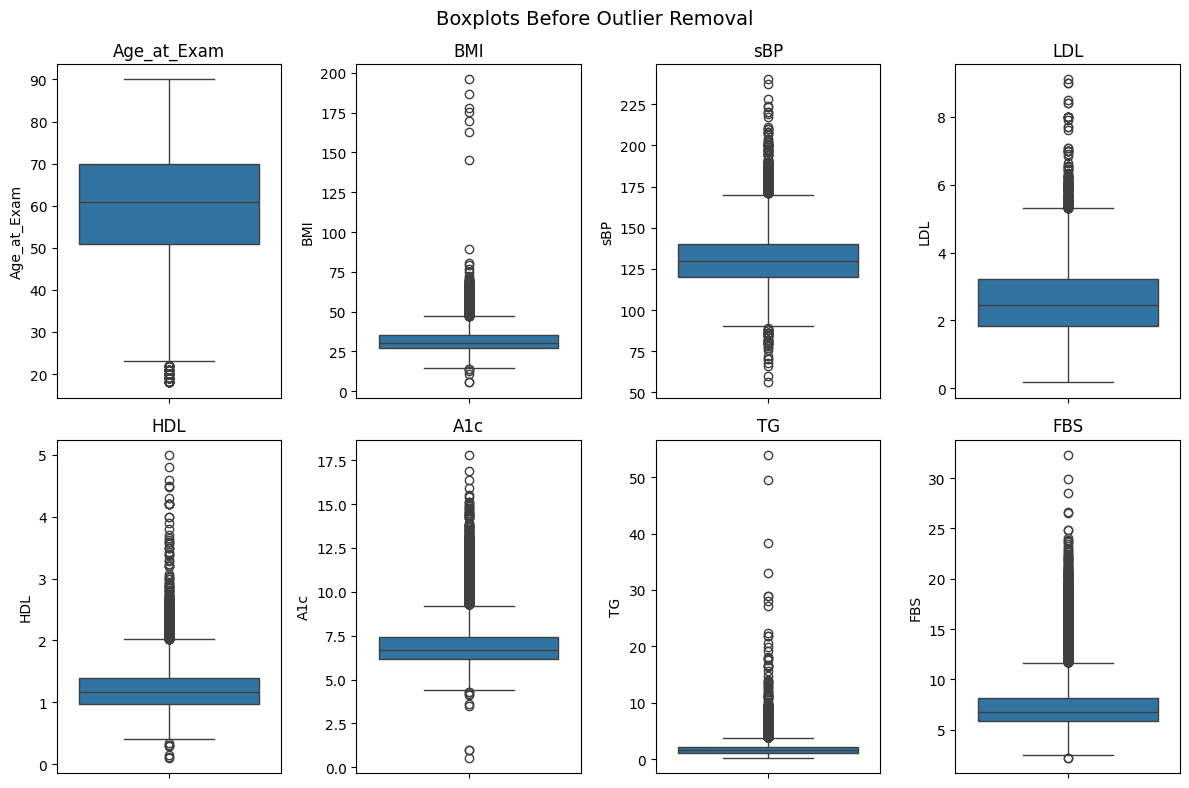

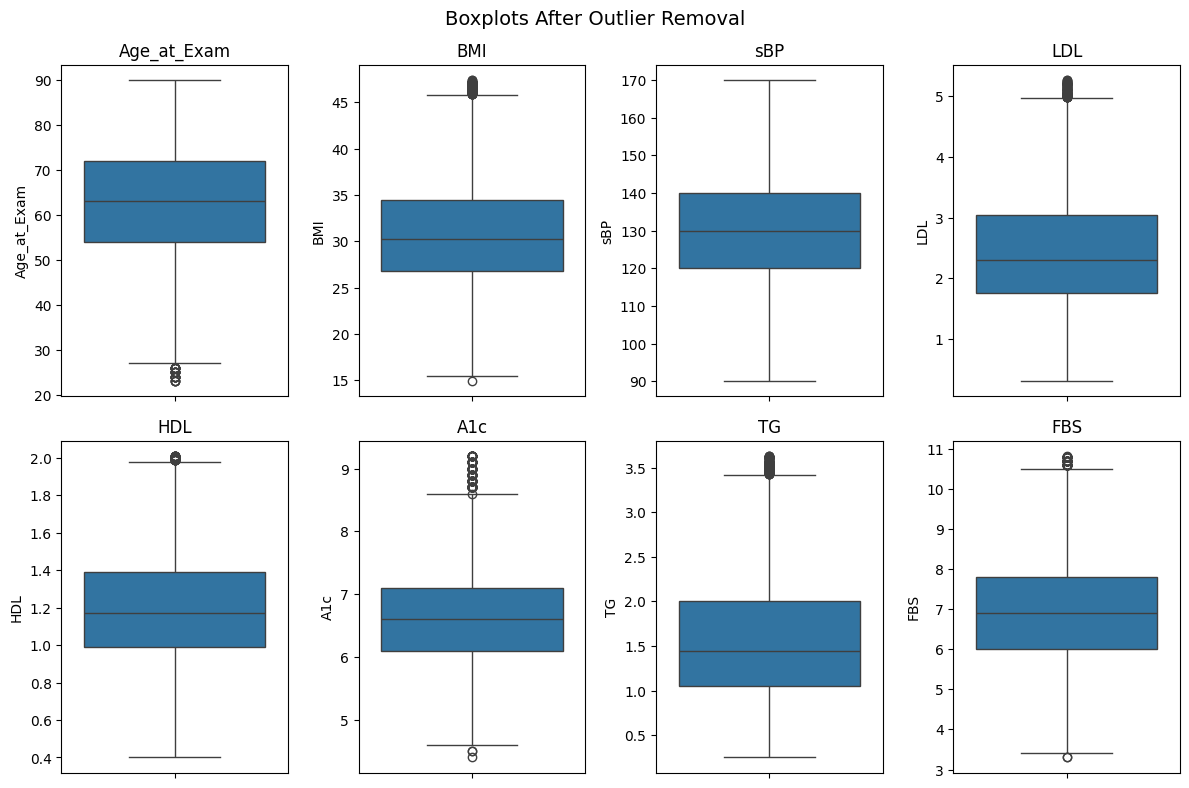

In [ ]:
#Check plausible values
#Continuous vars: Identify outliers using boxplots, remove outliers outside of IQR
#[Age_at_Exam, sBP, BMI, LDL, HDL, A1c, TG, FBS]
continuous_vars = ["Age_at_Exam", "BMI", "sBP","LDL", "HDL", "A1c", "TG", "FBS"]

# Function to plot boxplots
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(continuous_vars, 1):
        if col in df.columns:
            plt.subplot(2, 4, i)
            sns.boxplot(y=df[col])
            plt.title(col)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Function to remove outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        if col in df.columns:  # Ensure the column exists
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter data to keep only values within the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Plot boxplots before removing outliers
plot_boxplots(df, "Boxplots Before Outlier Removal")

# Apply the function to remove outliers
df = remove_outliers(df, continuous_vars)

# Plot boxplots after removing outliers
plot_boxplots(df, "Boxplots After Outlier Removal")

In [ ]:
# Get the list of column names
columns = df.columns.tolist()

# Find the indices of all 'Depression' columns
indices = [i for i, col in enumerate(columns) if col == 'Depression']

# If there are more than one 'Depression' columns, rename the second one
if len(indices) > 1:
    columns[indices[1]] = 'Depression_2'  # Rename second occurrence

# Assign the updated column names back to the DataFrame
df.columns = columns

print(df["Depression"])
print(df["Depression_2"])

713436    1
713625    0
712747    0
713441    1
712846    1
         ..
651407    0
651706    0
650846    1
650457    0
652667    0
Name: Depression, Length: 11371, dtype: int64
713436   NaN
713625   NaN
712747   NaN
713441   NaN
712846   NaN
          ..
651407   NaN
651706   NaN
650846   NaN
650457   NaN
652667   NaN
Name: Depression_2, Length: 11371, dtype: float64


In [ ]:
#Catergorical: Check for sparsity (count and %)
cat_vars = [
    "HTN", "Sex", "Depression", "OA", "COPD", "Anxiety", "Arrhythmia",
    "AtrialFibrillation", "Blindness", "CABG", "CAD", "Cancer",
    "Cardiomyopathy", "Cataract", "CKD", "DiabeticFootUlcer", "Dialysis",
    "Enteropathy", "ESRD", "Gangrene", "Gastroparesis", "GERD", "Glaucoma",
    "HeartTransplant", "IntermittentClaudication", "KidneyTransplant",
    "Microalbuminuria", "MyocardialInfarct", "NAFLD", "Nephropathy",
    "PeritonealDialysis", "Proteinuria", "PVD", "RetinalTear", "Retinopathy",
    "RIND", "Sarcoma", "Stent", "Stroke", "TIA", "UTI", "2ndline-antidiabetic",
    "anticholesterol", "antihtn", "corticosteroid", "1stlineantidiabetic"
]

# Function to calculate counts and percentages
def get_counts_and_percentages(df, var):
    counts = df[var].value_counts().reset_index()
    counts.columns = [var, 'count']
    counts['percentage'] = (counts['count'] / counts['count'].sum()) * 100
    return counts

# Apply the function to each categorical variable
results = {var: get_counts_and_percentages(df, var) for var in cat_vars}

# Print the results
for var, result in results.items():
    print(f"Results for {var}:")
    print(result)
    print("\n")

Results for HTN:
   HTN  count  percentage
0    1   5937   52.211767
1    0   5434   47.788233


Results for Sex:
      Sex  count  percentage
0    Male   6044   53.152757
1  Female   5327   46.847243


Results for Depression:
   Depression  count  percentage
0           0   9279   81.602322
1           1   2092   18.397678


Results for OA:
   OA  count  percentage
0   0   8233   72.403483
1   1   3138   27.596517


Results for COPD:
   COPD  count  percentage
0     0  10314   90.704424
1     1   1057    9.295576


Results for Anxiety:
   Anxiety  count  percentage
0        0  11343    99.75376
1        1     28     0.24624


Results for Arrhythmia:
   Arrhythmia  count  percentage
0           0  11370   99.991206
1           1      1    0.008794


Results for AtrialFibrillation:
   AtrialFibrillation  count  percentage
0                   0  11359   99.894468
1                   1     12    0.105532


Results for Blindness:
   Blindness  count  percentage
0          0  11370   99.991

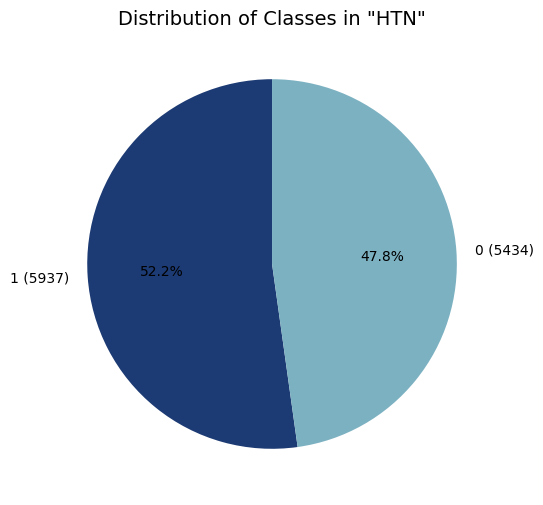

In [ ]:
### Create a pie chart to show the distribution of categories in HTN (class imbalance)
# Count occurrences of each class in our variable of interest
counts = df['HTN'].value_counts()

# Define colors
colors = ['#1c3a73', '#7cb1c2']

# Create pie chart
plt.figure(figsize=(6, 6)) #tuple for fig size, 6x6 inches
plt.pie(
    counts, #counts for each class
    labels=[f'{cls} ({count})' for cls, count in counts.items()],  # add labels with counts... counts.items() returns an iterable of tuples e.g., [('class', count)], which are then unpacked and formatted into labels
    autopct='%1.1f%%',  # Show percentages
    colors=colors,
    startangle=90
)

# Set title
plt.title('Distribution of Classes in "HTN"', fontsize=14)

# Show plot
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure categorical variables are encoded as numeric (if not already)
df_encoded = df.copy()
categorical_columns = [
    'Sex',
    'Depression',
    'OA',
    'COPD',
    'Anxiety',
    '2ndline-antidiabetic',
    'anticholesterol',
    'antihtn',
    'corticosteroid',
    '1stlineantidiabetic'
]

# Encode categorical variables as numeric (e.g., using one-hot encoding or label encoding)
for col in categorical_columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]  # Label encoding

# Select only the predictor variables (exclude the target variable if present)
predictors = df_encoded[[
    "Age_at_Exam",
    "BMI",
    "LDL",
    "HDL",
    "A1c",
    "TG",
    "FBS",
    'Sex',
    'Depression',
    'OA',
    'COPD',
    'Anxiety',
    '2ndline-antidiabetic',
    'anticholesterol',
    'antihtn',
    'corticosteroid',
    '1stlineantidiabetic'
]]

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF results
print(vif_data)

                Variable        VIF
0            Age_at_Exam  26.288939
1                    BMI  26.264407
2                    LDL   8.934828
3                    HDL  20.615168
4                    A1c  88.925599
5                     TG   7.265899
6                    FBS  42.416597
7                    Sex   2.409525
8             Depression   5.701267
9                     OA   3.757210
10                  COPD   1.141934
11               Anxiety   1.006146
12  2ndline-antidiabetic   1.459786
13       anticholesterol   9.836199
14               antihtn   3.026894
15        corticosteroid  26.702675
16   1stlineantidiabetic  10.480282


<ipython-input-16-13e06854ce94>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['SBP_Category'] = df['sBP'].apply(categorize_sbp)


SBP_Category  Elevated  Hypertension  Normal
HTN                                         
0                 1581          2371    1482
1                 1427          3647     863


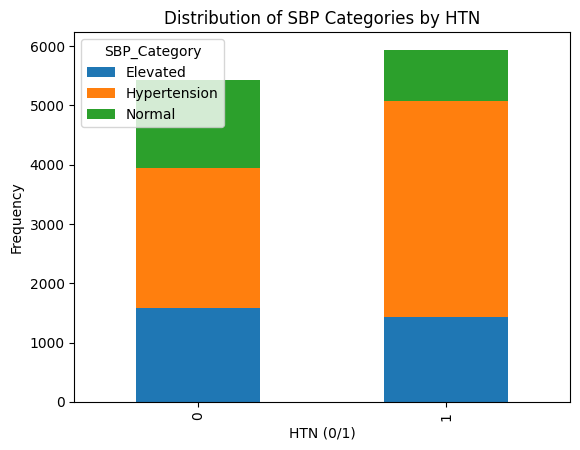

In [ ]:
# Create a 2x2 table for HTN and SBP
# Assuming 'HTN' is your hypertension variable (0/1) and 'sBP' is systolic blood pressure

# Define SBP categories (example)
def categorize_sbp(sbp):
    if sbp < 120:
        return 'Normal'
    elif 120 <= sbp < 130:
        return 'Elevated'
    else:
        return 'Hypertension'

df['SBP_Category'] = df['sBP'].apply(categorize_sbp)

# Create the contingency table
contingency_table = pd.crosstab(df['HTN'], df['SBP_Category'])

# Print the contingency table
print(contingency_table)

# You can also visualize this table
import matplotlib.pyplot as plt
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribution of SBP Categories by HTN')
plt.xlabel('HTN (0/1)')
plt.ylabel('Frequency')
plt.show()
#when categorizing sbp, many in elevated and hypertension categories are also HTN=1

In [ ]:
#Final Dataset--Saeedeh
columns_to_keep = [
    "Patient_ID", "Age_at_Exam", "HTN", "BMI",
    "LDL", "HDL", "TG", "Sex", "Depression",
    "OA", "COPD", "Anxiety", "2ndline-antidiabetic",
    "anticholesterol", "antihtn", "corticosteroid", "1stlineantidiabetic"
]

from sklearn.preprocessing import LabelEncoder

# Encoding 'Sex' column
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male: 1, Female: 0

# Keep only the selected columns in df2
df2 = df[columns_to_keep]

#Check for missing values
print(df2.isnull().sum())

Patient_ID              0
Age_at_Exam             0
HTN                     0
BMI                     0
LDL                     0
HDL                     0
TG                      0
Sex                     0
Depression              0
OA                      0
COPD                    0
Anxiety                 0
2ndline-antidiabetic    0
anticholesterol         0
antihtn                 0
corticosteroid          0
1stlineantidiabetic     0
dtype: int64


## Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
#Logistic Regression
#List of variables that are going to be included
X = df2[['Age_at_Exam', 'BMI', 'LDL', 'HDL', 'TG', 'Sex', 'Depression','OA', 'COPD', 'Anxiety', '2ndline-antidiabetic',
    'anticholesterol', 'antihtn', 'corticosteroid', '1stlineantidiabetic']]

y = df2['HTN']

#Step 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Step 2
# The pipeline ensures that scaling is applied within each fold of cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
])

#Step 3
#Hyperparameter optimization
log_reg = LogisticRegression()
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'model__penalty': ['l1', 'l2'],  # Type of regularization
    'model__solver': ['liblinear', "lbfgs", "saga"]  # Solver that works with both L1 and L2 penalties
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # 5-fold CV
    scoring='f1',  # Metric to optimize
    n_jobs=-1  # Use all available CPU cores
)

# Step 4
#Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Step 5
#Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Get the best model
y_test_pred = best_model.predict(X_test)  # Predict on the test set
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


Best Hyperparameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1087
           1       0.92      0.65      0.77      1188

    accuracy                           0.79      2275
   macro avg       0.82      0.80      0.79      2275
weighted avg       0.82      0.79      0.79      2275

Confusion Matrix:
[[1023   64]
 [ 410  778]]


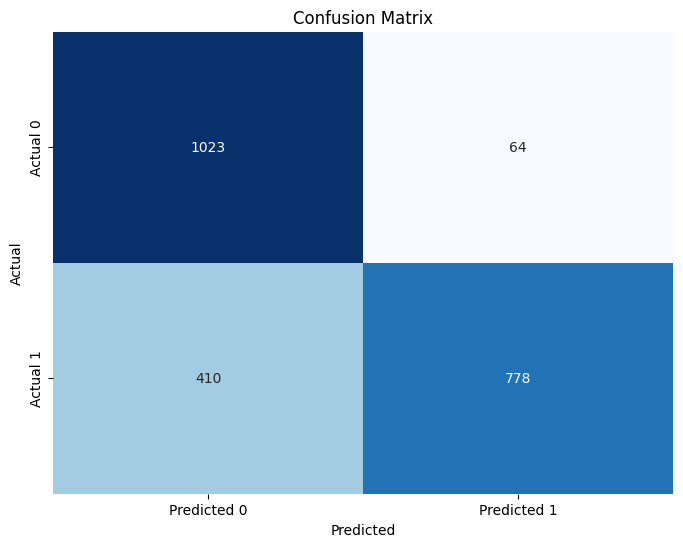

Test Fold Performance:
AUC: 0.8582 (95% CI: 0.8435 - 0.8736)
Precision: 0.9240 (95% CI: 0.9052 - 0.9427)
Recall: 0.6547 (95% CI: 0.6267 - 0.6809)
F1 Score: 0.7660 (95% CI: 0.7448 - 0.7863)


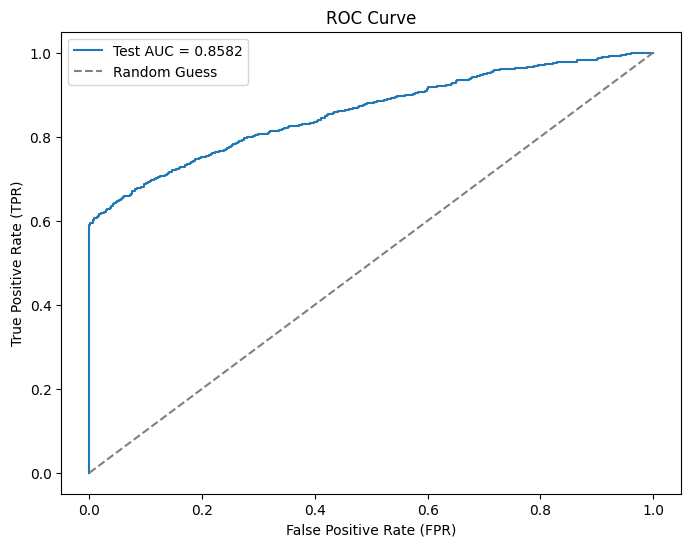

In [ ]:
# #Extra Sanity Check
# #Understanding the average performance
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# auc_scores = cross_val_score(
#     best_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1
# )

# scoring = {
#     'auc': 'roc_auc',
#     'accuracy': 'accuracy',
#     'precision': 'precision',
#     'recall': 'recall',
#     'f1': 'f1'
# }
# cv_results = cross_validate(
#     best_model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1
# )

# def confidence_interval(data, confidence=0.95):
#     n = len(data)
#     mean = np.mean(data)
#     se = sem(data)  # Standard error
#     h = se * t.ppf((1 + confidence) / 2., n - 1)  # Margin of error
#     return mean, mean - h, mean + h

# # Compute and print results with 95% CI
# metrics = ['test_auc', 'test_precision', 'test_recall', 'test_f1']
# print("Average Training Fold Performance:")
# for metric in metrics:
#     mean, lower, upper = confidence_interval(cv_results[metric])
#     print(f"{metric.replace('test_', '').upper()}: {mean:.4f} (95% CI: {lower:.4f} - {upper:.4f})")

# Step 6
#Reporting the final results
def bootstrap_ci(metric_fn, y_true, y_pred, y_proba=None, n_bootstrap=1000, confidence=0.95):
    metric_scores = []
    for _ in range(n_bootstrap):
        # Resample with replacement
        indices = resample(range(len(y_true)), replace=True, n_samples=len(y_true))
        y_true_sample = np.array(y_true)[indices]
        y_pred_sample = np.array(y_pred)[indices]

        # Compute metric
        if y_proba is not None:
            y_proba_sample = np.array(y_proba)[indices]
            score = metric_fn(y_true_sample, y_proba_sample)  # Used for AUC
        else:
            score = metric_fn(y_true_sample, y_pred_sample)  # Used for precision, recall, F1

        metric_scores.append(score)

    # Compute confidence interval
    lower = np.percentile(metric_scores, (1 - confidence) / 2 * 100)
    upper = np.percentile(metric_scores, (1 + confidence) / 2 * 100)

    return np.mean(metric_scores), lower, upper

# Compute classification metrics with 95% CI
auc_mean, auc_lower, auc_upper = bootstrap_ci(roc_auc_score, y_test, y_test_pred, y_test_proba)
precision_mean, precision_lower, precision_upper = bootstrap_ci(precision_score, y_test, y_test_pred)
recall_mean, recall_lower, recall_upper = bootstrap_ci(recall_score, y_test, y_test_pred)
f1_mean, f1_lower, f1_upper = bootstrap_ci(f1_score, y_test, y_test_pred)

# Report Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Report Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print AUC with CI
print("Test Fold Performance:")
print(f"AUC: {auc_mean:.4f} (95% CI: {auc_lower:.4f} - {auc_upper:.4f})")
print(f"Precision: {precision_mean:.4f} (95% CI: {precision_lower:.4f} - {precision_upper:.4f})")
print(f"Recall: {recall_mean:.4f} (95% CI: {recall_lower:.4f} - {recall_upper:.4f})")
print(f"F1 Score: {f1_mean:.4f} (95% CI: {f1_lower:.4f} - {f1_upper:.4f})")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Test AUC = {auc_mean:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Random forest

In [ ]:
#XGBoost

In [ ]:
#Support Vector Machines

In [ ]:
#KNN

In [ ]:
#Naive Bayes